In [1]:
# You may need to install scikit-plot for the evaluatioin cells as it is not part of Anaconda
# %pip install scikit-plot

# Multi-class classification
This notebook introduces machine learning by performing a classification experiment

In [2]:
import pandas as pd
import numpy as np

dfPlayers = pd.read_csv('../Data/player_info.csv')
dfPlayers.head()

,player_id,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,birthStateProvince,height,height_cm,weight,shootsCatches
0,8466148,Marian,Hossa,SVK,Stará Lubovna,RW,1979-01-12 00:00:00,NaN,"6' 1""",185.42,207.0,L
1,8465058,Michal,Rozsival,CZE,Vlasim,D,1978-09-03 01:00:00,NaN,"6' 1""",185.42,210.0,R
2,8476906,Shayne,Gostisbehere,USA,Pembroke Pines,D,1993-04-20 01:00:00,FL,"5' 11""",180.34,180.0,L
3,8466285,Brian,Campbell,CAN,Strathroy,D,1979-05-23 01:00:00,ON,"5' 10""",177.80,192.0,L
4,8470607,Brent,Seabrook,CAN,Richmond,D,1985-04-20 01:00:00,BC,"6' 3""",190.50,220.0,R


In [3]:
dfSkaterStats = pd.read_csv('../Data/game_skater_stats.csv')
dfSkaterStats.head()

,game_id,player_id,team_id,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,...,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
0,2018020001,8473507,8,1437,0,0,3,3.0,0,0,...,0,2.0,1.0,0,0,1.0,-1,1105,82,250
1,2018020001,8474818,8,893,0,0,1,3.0,0,0,...,0,0.0,0.0,0,0,1.0,0,806,87,0
2,2018020001,8480829,8,905,1,0,2,0.0,0,1,...,7,0.0,0.0,0,0,0.0,0,753,0,152
3,2018020001,8474038,8,883,1,0,2,3.0,0,0,...,1,0.0,0.0,0,0,1.0,1,788,65,30
4,2018020001,8475848,8,982,0,0,5,1.0,0,0,...,4,0.0,1.0,0,0,1.0,0,763,0,219


In [4]:
dfStats = dfSkaterStats.drop(columns=['game_id', 'team_id'])
dfStats = dfStats.groupby(['player_id']).mean()
dfStats.head()

,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,penaltyMinutes,faceOffWins,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
player_id,,,,,,,,,,,,,,,,,,,
8464989,689.586667,0.173333,0.093333,1.200000,0.506667,0.000000,0.000000,0.186667,4.546667,9.040000,0.320000,0.333333,0.026667,0.026667,0.440000,0.066667,551.653333,135.266667,2.666667
8465009,1271.070588,0.152941,0.082353,1.411765,1.623529,0.011765,0.023529,0.858824,0.000000,0.000000,0.388235,0.682353,0.000000,0.000000,1.552941,0.388235,1085.823529,180.082353,5.164706
8466138,937.652174,0.445652,0.217391,1.293478,0.239130,0.032609,0.141304,0.282609,5.086957,9.706522,0.586957,0.565217,0.000000,0.000000,0.239130,0.021739,819.826087,0.782609,117.043478
8466139,972.741573,0.258427,0.179775,1.898876,0.977528,0.044944,0.067416,0.337079,1.426966,2.696629,0.382022,0.258427,0.000000,0.000000,0.471910,-0.056180,863.932584,4.685393,104.123596
8468001,163.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163.000000,0.000000,0.000000


In [5]:
dfPlayerStats = pd.merge(dfPlayers, dfStats, on='player_id')
dfPlayerStats.head()

,player_id,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,birthStateProvince,height,height_cm,...,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
0,8476906,Shayne,Gostisbehere,USA,Pembroke Pines,D,1993-04-20 01:00:00,FL,"5' 11""",180.34,...,0.000000,0.256410,0.679487,0.000000,0.000000,1.307692,-0.256410,965.576923,5.307692,208.666667
1,8470607,Brent,Seabrook,CAN,Richmond,D,1985-04-20 01:00:00,BC,"6' 3""",190.50,...,0.000000,0.243590,0.923077,0.000000,0.012821,2.307692,-0.076923,921.166667,126.871795,97.769231
2,8474668,Dale,Weise,CAN,Winnipeg,RW,1988-08-05 01:00:00,MB,"6' 2""",187.96,...,0.313725,0.176471,0.196078,0.019608,0.000000,0.411765,-0.156863,622.686275,77.764706,6.156863
3,8473512,Claude,Giroux,CAN,Hearst,C,1988-01-12 00:00:00,ON,"5' 11""",180.34,...,13.964286,0.559524,0.571429,0.011905,0.000000,0.226190,0.071429,957.702381,101.595238,206.000000
4,8476994,Vinnie,Hinostroza,USA,Chicago,LW,1994-04-03 01:00:00,IL,"5' 9""",175.26,...,1.430556,0.388889,0.472222,0.000000,0.000000,0.569444,-0.055556,827.527778,9.736111,78.791667


In [6]:
dfPlayerStats = dfPlayerStats[dfPlayerStats['primaryPosition'] != 'G']
dfPlayerStats['primaryPosition'].value_counts()

primaryPosition
D     327
C     282
LW    163
RW    138
Name: count, dtype: int64

In [7]:
dfPlayerStats.columns

Index(['player_id', 'firstName', 'lastName', 'nationality', 'birthCity',
       'primaryPosition', 'birthDate', 'birthStateProvince', 'height',
       'height_cm', 'weight', 'shootsCatches', 'timeOnIce', 'assists', 'goals',
       'shots', 'hits', 'powerPlayGoals', 'powerPlayAssists', 'penaltyMinutes',
       'faceOffWins', 'faceoffTaken', 'takeaways', 'giveaways',
       'shortHandedGoals', 'shortHandedAssists', 'blocked', 'plusMinus',
       'evenTimeOnIce', 'shortHandedTimeOnIce', 'powerPlayTimeOnIce'],
      dtype='object')

In [8]:
# Feature engineering: Let's add an Age column based on the year of birth and the current year in the data (2018)
dfPlayerStats['Age'] = 2018 - dfPlayerStats['birthDate'].str[:4].astype(int)
dfPlayerStats.sort_values('Age')['Age'].value_counts()

Age
24    99
25    86
23    84
26    80
22    77
28    69
27    66
21    63
29    47
30    39
20    39
31    38
33    30
32    23
19    21
34    20
35    10
36     5
37     5
39     3
18     3
38     1
41     1
42     1
Name: count, dtype: int64

In [9]:
import plotly.express as px

# Specify defaults for Plotly settings
px.defaults.color_continuous_scale = px.colors.sequential.Agsunset
px.defaults.color_discrete_sequence = px.colors.qualitative.Prism
px.defaults.template = 'plotly_dark'
#px.defaults.template = 'plotly_white'

In [10]:
px.histogram(dfPlayerStats.sort_values('Age'), 
             x='Age', 
             title='Age Distribution of Skaters by Position', 
             labels={'primaryPosition': 'Position'},
             color='primaryPosition')

In [11]:
dfPlayerStats = dfPlayerStats.drop(columns=['player_id', 'firstName', 'lastName', 'height','nationality', 'birthCity', 'birthStateProvince','birthDate'])

In [12]:
dfPlayerStats.columns

Index(['primaryPosition', 'height_cm', 'weight', 'shootsCatches', 'timeOnIce',
       'assists', 'goals', 'shots', 'hits', 'powerPlayGoals',
       'powerPlayAssists', 'penaltyMinutes', 'faceOffWins', 'faceoffTaken',
       'takeaways', 'giveaways', 'shortHandedGoals', 'shortHandedAssists',
       'blocked', 'plusMinus', 'evenTimeOnIce', 'shortHandedTimeOnIce',
       'powerPlayTimeOnIce', 'Age'],
      dtype='object')

In [13]:
dfPlayerStats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   primaryPosition       910 non-null    object 
 1   height_cm             910 non-null    float64
 2   weight                910 non-null    float64
 3   shootsCatches         910 non-null    object 
 4   timeOnIce             910 non-null    float64
 5   assists               910 non-null    float64
 6   goals                 910 non-null    float64
 7   shots                 910 non-null    float64
 8   hits                  910 non-null    float64
 9   powerPlayGoals        910 non-null    float64
 10  powerPlayAssists      910 non-null    float64
 11  penaltyMinutes        910 non-null    float64
 12  faceOffWins           910 non-null    float64
 13  faceoffTaken          910 non-null    float64
 14  takeaways             910 non-null    float64
 15  giveaways             9

In [14]:
dfPlayerStats['shootsCatches'].value_counts()

shootsCatches
L    574
R    336
Name: count, dtype: int64

In [15]:
dfPlayerStats['ShootsRight'] = dfPlayerStats['shootsCatches'] == 'R'
dfPlayerStats['ShootsRight'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 910 entries, 0 to 909
Series name: ShootsRight
Non-Null Count  Dtype
--------------  -----
910 non-null    bool 
dtypes: bool(1)
memory usage: 1.0 KB


In [16]:
dfPlayerStats = dfPlayerStats.drop(columns=['shootsCatches'])

In [17]:
dfCorrable = pd.get_dummies(dfPlayerStats, columns=['primaryPosition'])
dfCorrable.head()

,height_cm,weight,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,penaltyMinutes,...,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce,Age,ShootsRight,primaryPosition_C,primaryPosition_D,primaryPosition_LW,primaryPosition_RW
0,180.34,180.0,1179.551282,0.358974,0.115385,2.307692,0.589744,0.051282,0.128205,0.282051,...,-0.256410,965.576923,5.307692,208.666667,25,False,False,True,False,False
1,190.50,220.0,1145.807692,0.294872,0.064103,2.115385,1.589744,0.025641,0.102564,0.525641,...,-0.076923,921.166667,126.871795,97.769231,33,True,False,True,False,False
2,187.96,206.0,706.607843,0.117647,0.098039,1.137255,1.725490,0.000000,0.000000,0.372549,...,-0.156863,622.686275,77.764706,6.156863,30,True,False,False,False,True
3,180.34,185.0,1265.297619,0.761905,0.273810,2.797619,0.333333,0.023810,0.250000,0.285714,...,0.071429,957.702381,101.595238,206.000000,30,True,True,False,False,False
4,175.26,173.0,916.055556,0.319444,0.222222,2.111111,0.958333,0.041667,0.027778,0.194444,...,-0.055556,827.527778,9.736111,78.791667,24,True,False,False,True,False


## Correlation Analysis

In [18]:
corr = dfCorrable.corr()

mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

import plotly.graph_objects as go

# Create a masked correlation matrix
masked_corr = corr.mask(mask)
#masked_corr = masked_corr.iloc[::-1,::-1]

heat = go.Heatmap(z=masked_corr,
                  x=dfCorrable.columns,
                  y=dfCorrable.columns,
                  xgap=1, ygap=1,
                  colorbar_thickness=20,
                  colorbar_ticklen=3,
                   )


title = 'Correlation Matrix'               

layout = go.Layout(title_text=title, title_x=0.5, 
                   height=800,
                   xaxis_showgrid=False,
                   yaxis_showgrid=False,
                   yaxis_autorange='reversed')
   
fig=go.Figure(data=[heat], layout=layout)        
fig.show() 

## Test / Train Split

In [19]:
# Identify features (X) and label (y)
X = dfPlayerStats.drop(columns=['primaryPosition']) # These are our features - they factor into what the value of label should be
y = dfPlayerStats['primaryPosition'] # This is our label - the thing we're trying to predict

In [20]:
# Split the data into a training set and a test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Fitting

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Algorithm options
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Select a model trainer
#model = DecisionTreeClassifier()
model = RandomForestClassifier()
#model = LogisticRegression()
#model = SVC(probability=True)
#model = GaussianNB()

# Create a pipeline
pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
#    ('scaler', MinMaxScaler((0, 1))), 
    ('model', model)
])

# Actually train our model
pipe.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('model', RandomForestClassifier())])

## Model Evaluation

In [22]:
# Evaluate the model
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           C       0.76      0.72      0.74        61
           D       0.83      0.98      0.90        58
          LW       0.65      0.63      0.64        38
          RW       0.67      0.48      0.56        25

    accuracy                           0.75       182
   macro avg       0.73      0.70      0.71       182
weighted avg       0.74      0.75      0.74       182



/home/matteland/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

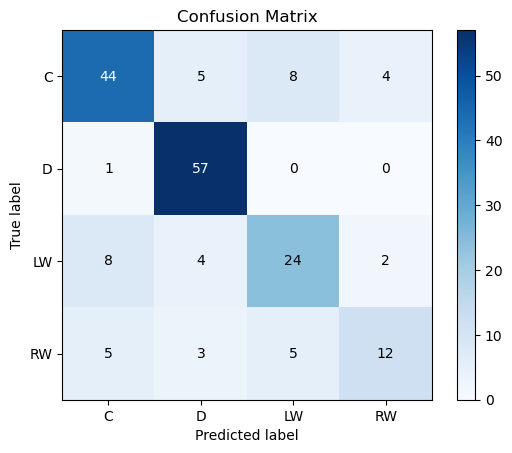

In [23]:
# Scikit plot classification
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test, y_pred)

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

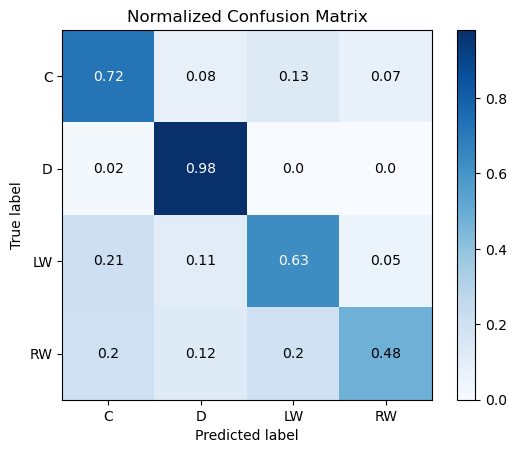

In [24]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

/home/matteland/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

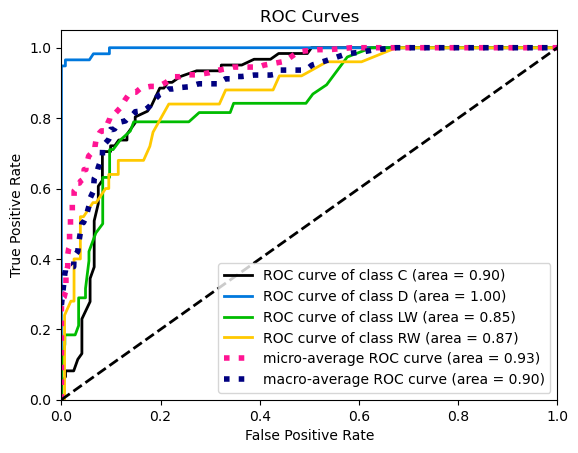

In [25]:
skplt.metrics.plot_roc(y_test, model.predict_proba(X_test))

/home/matteland/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



<Axes: title={'center': 'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

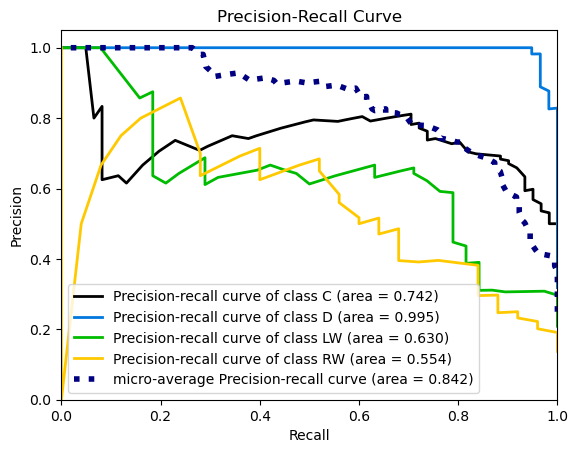

In [26]:
skplt.metrics.plot_precision_recall(y_test, model.predict_proba(X_test))

## Feature Importances

In [27]:
# Calculate feature importance for our model
importances = model.feature_importances_
indices = np.argsort(importances)[::-1][:10]

# Plot the feature importances using plotly.express
px.bar(x=X.columns[indices], y=importances[indices], title='Top Features by Importance', color=importances[indices], labels={'x': 'Feature', 'y': 'Importance'}, orientation='v')

## Generating Predictions

In [28]:
# Create a sample player to test the model
sample_player = pd.DataFrame({
    'height_cm': [180],
    'weight': [180],
    'timeOnIce': [1200],
    'assists': [20],
    'goals': [5],
    'shots': [100],
    'hits': [50],
    'powerPlayGoals': [1],
    'powerPlayAssists': [5],
    'penaltyMinutes': [20],
    'faceOffWins': [100],
    'faceoffTaken': [200],
    'takeaways': [10],
    'giveaways': [5],
    'shortHandedGoals': [1],
    'shortHandedAssists': [2],
    'blocked': [50],
    'plusMinus': [5],
    'evenTimeOnIce': [1000],
    'shortHandedTimeOnIce': [100],
    'powerPlayTimeOnIce': [100],
    'Age': [25],
    'ShootsRight': [True]
})

# Predict whether the sample player is a defenseman
pipe.predict(sample_player)

array(['C'], dtype=object)

In [29]:
pipe.predict_proba(sample_player)

array([[0.39, 0.06, 0.18, 0.37]])

In [31]:
# Figure out what predict_proba refers to for each label
pipe.classes_

array(['C', 'D', 'LW', 'RW'], dtype=object)